In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.metrics import r2_score
import csv
import math

In [2]:
file1 = 'combined_data.csv'

In [3]:
df1 = pd.read_csv(file1)

In [4]:
df1.head(5)

,Unnamed: 0,Unnamed: 0.1,Year,County,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error,% of Total Deaths,Divorce Count,education: less_than_high_school,household: foster_kids,household: people_living_alone,household: in_group_quarters,household: nonrelatives_in_nonfamily_households
0,0,0,2015,Adams County,13,22006,Unreliable,31.5,101.0,16.4,0.10%,119.0,4567,4,2986,382,1215
1,1,1,2015,Allen County,21,82914,25.3,15.7,38.7,5.5,0.10%,326.0,9260,0,11468,3917,3970
2,2,2,2015,Ashtabula County,24,79192,30.3,19.4,45.1,6.2,0.10%,344.0,12061,54,11345,3502,3908
3,3,3,2015,Belmont County,18,57540,Unreliable,18.5,49.4,7.4,0.10%,229.0,6322,19,8644,4044,1932
4,4,4,2015,Brown County,26,34930,74.4,48.6,109.1,14.6,0.10%,168.0,5160,12,3886,581,1564


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Unnamed: 0                                       250 non-null    int64  
 1   Unnamed: 0.1                                     250 non-null    int64  
 2   Year                                             250 non-null    int64  
 3   County                                           250 non-null    object 
 4   Deaths                                           250 non-null    int64  
 5   Population                                       250 non-null    int64  
 6   Crude Rate                                       250 non-null    object 
 7   Crude Rate Lower 95% Confidence Interval         250 non-null    float64
 8   Crude Rate Upper 95% Confidence Interval         250 non-null    float64
 9   Crude Rate Standard Error       

pd_data.head(10) = 
   Unnamed: 0  Unnamed: 0.1  Year             County  Deaths  Population  \
0           0             0  2015       Adams County      13       22006   
1           1             1  2015       Allen County      21       82914   
2           2             2  2015   Ashtabula County      24       79192   
3           3             3  2015     Belmont County      18       57540   
4           4             4  2015       Brown County      26       34930   
5           5             5  2015      Butler County     201      296652   
6           6             6  2015       Clark County      78      108703   
7           7             7  2015    Clermont County     104      159508   
8           8             8  2015     Clinton County      22       33175   
9           9             9  2015  Columbiana County      32       85642   

   Crude Rate  Crude Rate Lower 95% Confidence Interval  \
0  Unreliable                                      31.5   
1        25.3            

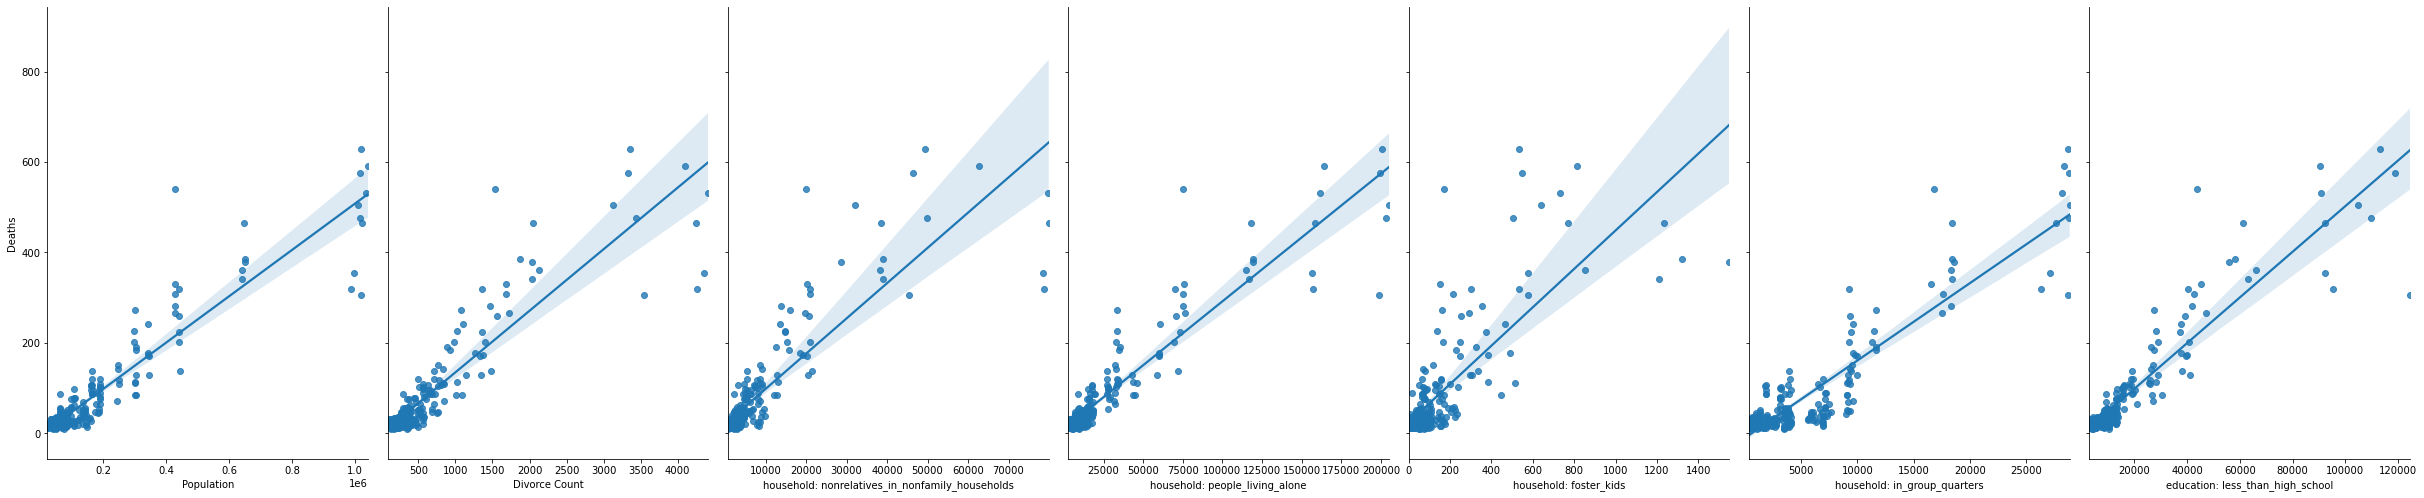

In [6]:
# check the scatter plot
pd_data = pd.read_csv(file1)
print('pd_data.head(10) = \n{}'.format(pd_data.head(10)))
sns.pairplot(pd_data, x_vars=['Population', 'Divorce Count','household: nonrelatives_in_nonfamily_households', 'household: people_living_alone', 'household: foster_kids', 'household: in_group_quarters', 'education: less_than_high_school'], y_vars = 'Deaths', kind = 'reg', height = 7, aspect = 0.7)
plt.savefig("scatterplot_original.jpg")
plt.show()


parameters of training set and test set:
x_train.shape=(200, 7)
 x_test.shape=(200,)
, y_test.shape=(50, 7)
parameters of model:
LinearRegression()
model intercept
-3.837431642006635
parameter weights
[ 0.00037159 -0.0463165  -0.00053973  0.00027065  0.06512171  0.00263469
  0.00139696]
RMSE: 55.64704200445388
Rsquare score: 0.8076451518916181


<function matplotlib.pyplot.show(close=None, block=None)>

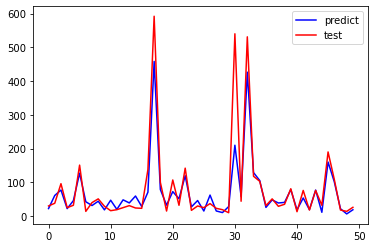

In [7]:
#train our model
from sklearn.model_selection import train_test_split#cross-verification
from sklearn.linear_model import LinearRegression

x = pd_data.loc[:, ('Population', 'Divorce Count', 'household: nonrelatives_in_nonfamily_households', 'household: people_living_alone', 'household: foster_kids','household: in_group_quarters', 'education: less_than_high_school')]
y = pd_data.loc[:, 'Deaths']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 232)#set 20% of the data as test set
print('parameters of training set and test set:')
print('x_train.shape={}\n x_test.shape={}\n, y_test.shape={}'.format(x_train.shape, y_train.shape, x_test.shape,y_test.shape))

linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
print('parameters of model:')
print(model)
print('model intercept')
print(linreg.intercept_)
print('parameter weights')
print(linreg.coef_)

y_pred = linreg.predict(x_test)
sum_mean = 0
for i in range(len(y_pred)):
    sum_mean += (y_pred[i] - y_test.values[i]) **2
sum_erro = np.sqrt(sum_mean/len(y_pred))#the scale of test set

#calculate RMSE
print('RMSE:', sum_erro)

#calculate Rsquare score
print('Rsquare score:', r2_score(y_test,y_pred))

# plot ROC
plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b', label = 'predict')
plt.plot(range(len(y_pred)), y_test, 'r', label = 'test')
plt.legend(loc='upper right')
plt.savefig("ROC1.jpg")
plt.show


end


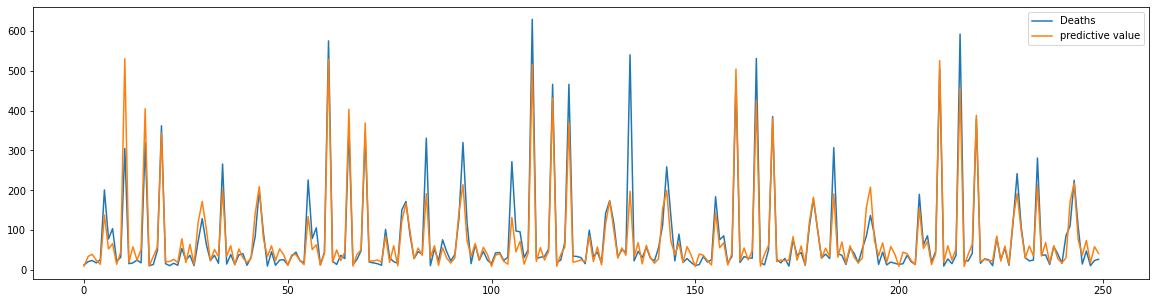

In [8]:
# total set
pd_data = pd.read_csv(file1)
sam = []
a = ['Deaths', 'Population', 'Divorce Count', 'household: nonrelatives_in_nonfamily_households', 'household: people_living_alone', 'household: foster_kids', 'education: less_than_high_school']
dic={}
for i in a:
    y = pd_data.loc[:,i]
    dic[i] = list(y)
for i in range(len(dic['Deaths'])):
    x = -1.7039413827537686 + float(dic['Population'][i]) * 0.00044392 + float(dic['Divorce Count'][i]) * (-0.05244075) + float(dic['household: nonrelatives_in_nonfamily_households'][i]) * -0.00039759 + float(dic['household: people_living_alone'][i]) * (0.0001909) + float(dic['household: foster_kids'][i]) * 0.06680474 + float(dic['education: less_than_high_school'][i]) * (0.00166019)
    sam.append(x)
    
with open('model1_test2.csv','w') as file:
    writer = csv.writer(file)
    writer.writerow(['Deaths','predictive value'])
    for i in range(len(sam)):
        writer.writerow([dic['Deaths'][i],sam[i]])
                         
print('end')
pd_data = pd.read_csv('model1_test2.csv')
pd_data.plot(figsize = (20,5))
plt.show()
    
    